In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../../Dataset/dataset_review_aplikasi_ikd_play_store.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
5117,7fcdee1d-105c-4e7d-9009-ce433a9e80ae,Ismail Is,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih baoak durjen atas aplikasi ikdnya ...,5,0,1.2.2,2024-01-04 10:33:49,NaN,NaN,1.2.2
5118,bb1be052-c18c-4a82-baf2-ed0fb34e98aa,Inayah Safitri,https://play-lh.googleusercontent.com/a/ACg8oc...,semoga aplikasi lebih baik,5,0,1.2.2,2024-01-04 10:21:41,NaN,NaN,1.2.2
5119,a8629511-0d10-41ae-ab49-604c2f49d818,Kholidwalid Silver,https://play-lh.googleusercontent.com/a/ACg8oc...,Semoga lebih baik,5,0,1.2.2,2024-01-04 09:44:45,NaN,NaN,1.2.2
5120,369db5d1-2531-4090-bb80-d3918ad7c53e,Fajri Hz,https://play-lh.googleusercontent.com/a-/ALV-U...,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5,0,1.2.2,2024-01-04 09:34:00,NaN,NaN,1.2.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              5122 non-null   object 
 1   userName              5122 non-null   object 
 2   userImage             5122 non-null   object 
 3   content               5122 non-null   object 
 4   score                 5122 non-null   int64  
 5   thumbsUpCount         5122 non-null   int64  
 6   reviewCreatedVersion  4336 non-null   object 
 7   at                    5122 non-null   object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            4336 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 440.3+ KB


In [4]:
df = df.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'])
df

,content,score
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
5117,Terimakasih baoak durjen atas aplikasi ikdnya ...,5
5118,semoga aplikasi lebih baik,5
5119,Semoga lebih baik,5
5120,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5


In [5]:
df.rename(columns={'score':'sentiment'}, inplace=True)
df

,content,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
5117,Terimakasih baoak durjen atas aplikasi ikdnya ...,5
5118,semoga aplikasi lebih baik,5
5119,Semoga lebih baik,5
5120,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5


In [6]:
print("0 = Negatif")
print("1 = Positif")

df.replace([1,2,3], 0, inplace=True)
df.replace([4,5], 1, inplace=True)
df

0 = Negatif
1 = Positif


,content,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,0
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,0
2,"Harus dibuka pake WiFi, kalo pake paket data p...",0
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",0
4,Sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
5117,Terimakasih baoak durjen atas aplikasi ikdnya ...,1
5118,semoga aplikasi lebih baik,1
5119,Semoga lebih baik,1
5120,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    5122 non-null   object
 1   sentiment  5122 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.2+ KB


In [8]:
df.isnull().sum()

content      0
sentiment    0
dtype: int64

In [9]:
# Case Folding
def lower(text):
    text = text.lower() # mengubah ke lower case
    return text

In [10]:
df['content'] = df['content'].apply(lower)
df

,content,sentiment
0,aplikasi menyusahkan. dimana2 fungsi software ...,0
1,sy sangat kecewa aplikasi yang buruk.. selesai...,0
2,"harus dibuka pake wifi, kalo pake paket data p...",0
3,"aplikasi nya sangat sangat tdk membantu, saat ...",0
4,sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
5117,terimakasih baoak durjen atas aplikasi ikdnya ...,1
5118,semoga aplikasi lebih baik,1
5119,semoga lebih baik,1
5120,"saya pakai data kartu tri cuma muter2 doang, p...",1


In [11]:
# Remove Punctuation & Number

def remove_punctuation_and_number(text):
    text = text.translate(str.maketrans("","",string.punctuation + string.digits))
    return text

In [12]:
df['content'] = df['content'].apply(remove_punctuation_and_number)
df

,content,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
5117,terimakasih baoak durjen atas aplikasi ikdnya ...,1
5118,semoga aplikasi lebih baik,1
5119,semoga lebih baik,1
5120,saya pakai data kartu tri cuma muter doang pas...,1


In [13]:
# Remove Whitespace
def remove_whitespace(text):
    correct = str(text)
    correct = re.sub(r"//t",r"\t", correct)
    correct = re.sub(r"( )\1+",r"\1", correct)
    correct = re.sub(r"(\n)\1+",r"\1", correct)
    correct = re.sub(r"(\r)\1+",r"\1", correct)
    correct = re.sub(r"(\t)\1+",r"\1", correct)
    return correct.strip()

In [14]:
df['content'] = df['content'].apply(remove_whitespace)
df

,content,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
5117,terimakasih baoak durjen atas aplikasi ikdnya ...,1
5118,semoga aplikasi lebih baik,1
5119,semoga lebih baik,1
5120,saya pakai data kartu tri cuma muter doang pas...,1


In [15]:
# Tokenize
def tokenizing(text):
    text = word_tokenize(text)
    return text

In [16]:
df['content'] = df['content'].apply(tokenizing)
df

,content,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, sangat, kecewa, aplikasi, yang, buruk, se...",0
2,"[harus, dibuka, pake, wifi, kalo, pake, paket,...",0
3,"[aplikasi, nya, sangat, sangat, tdk, membantu,...",0
4,"[sudah, login, berkalikali, tetap, saja, yg, m...",0
...,...,...
5117,"[terimakasih, baoak, durjen, atas, aplikasi, i...",1
5118,"[semoga, aplikasi, lebih, baik]",1
5119,"[semoga, lebih, baik]",1
5120,"[saya, pakai, data, kartu, tri, cuma, muter, d...",1


Perbaikan ejaan harus dilakukan sebelum proses stopwords

In [17]:
# kamus_kata_tidak_baku = pd.read_csv("../../Dataset/Kamus Kata Tidak Baku/kamus-alay/colloquial-indonesian-lexicon.csv")
# kamus_kata_tidak_baku.head()

In [18]:
# # Spell Checking
# def spell_checking(text, nonformal_word):
#     for index in text:
#         index_nonformal = nonformal_word.slang==text[index]
#         formal = list(set(nonformal_word[index_nonformal].formal))
#         if len(formal) == 1:
#             text[index] = formal[0]
#     return text

In [19]:
# df['content'].apply(lambda text: spell_checking(text, kamus_kata_tidak_baku))

In [20]:
# Stopwords with Sastrawi
factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()

def remove_stopwords_with_sastrawi(text):
    text = [word for word in text if word not in stopword_sastrawi]
    return text

In [21]:
df['content'] = df['content'].apply(remove_stopwords_with_sastrawi)
df

,content,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftark...",0
2,"[dibuka, pake, wifi, kalo, pake, paket, data, ...",0
3,"[aplikasi, tdk, membantu, membukanya, dukcapil...",0
4,"[login, berkalikali, yg, muncul, jaringan, sta...",0
...,...,...
5117,"[terimakasih, baoak, durjen, aplikasi, ikdnya,...",1
5118,"[semoga, aplikasi]",1
5119,[semoga],1
5120,"[pakai, data, kartu, tri, muter, doang, pas, c...",1


In [22]:
# Stemming with Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(token) for token in text]
    return text

In [23]:
df['content'] = df['content'].apply(stemming)
df

,content,sentiment
0,"[aplikasi, susah, mana, fungsi, software, muda...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftar,...",0
2,"[buka, pake, wifi, kalo, pake, paket, data, pr...",0
3,"[aplikasi, tdk, bantu, buka, dukcapil, wajib, ...",0
4,"[login, berkalikali, yg, muncul, jaring, stabi...",0
...,...,...
5117,"[terimakasih, baoak, durjen, aplikasi, ikdnya,...",1
5118,"[moga, aplikasi]",1
5119,[moga],1
5120,"[pakai, data, kartu, tri, muter, doang, pas, c...",1


In [24]:
# Menggabungkan kata-kata menjadi satu kalimat per baris
corpus = []

for i in range(len(df['content'])):
    word = df['content'][i]
    row = ' '.join(word)
    corpus.append(row)

df['content'] = corpus
df

,content,sentiment
0,aplikasi susah mana fungsi software mudah ruma...,0
1,sy kecewa aplikasi buruk selesai daftar bukati...,0
2,buka pake wifi kalo pake paket data pribadi ga...,0
3,aplikasi tdk bantu buka dukcapil wajib mengins...,0
4,login berkalikali yg muncul jaring stabil jari...,0
...,...,...
5117,terimakasih baoak durjen aplikasi ikdnya sungg...,1
5118,moga aplikasi,1
5119,moga,1
5120,pakai data kartu tri muter doang pas coba paka...,1


In [25]:
X = df['content']
y = df['sentiment']

Keterangan:
0 = Negatif
1 = Positif


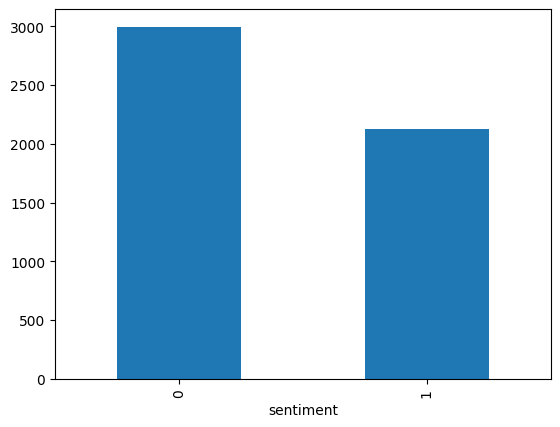

In [26]:
y.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train)

2233    foto copy cetak gimana karna yg fisik hancur k...
3651    aplikasih bikin susah bulak foto ulang ulang u...
3618    daftar aja pakai disdukcapil mikir warga ktp e...
2910    tampil ktp digital anggota keluarga aplikasi b...
2344         aplikasi ikd ga bukamohonperhatian terimasih
                              ...                        
4426                               mudah akses informatif
466     daftar lengkap eh akhir suruh dukcapil digital...
3092    apk bagus nyimpan data ektp gk bingung kalo kt...
3772                                           salah trus
860     baik kerja apk permasalahnnya apk koneksi bagu...
Name: content, Length: 4097, dtype: object


In [29]:
count_vectorizer = CountVectorizer()
X_train_cv = count_vectorizer.fit_transform(X_train)

In [30]:
oversampler = SMOTE()
X_train_cv_resampled, y_train_resampled = oversampler.fit_resample(X_train_cv, y_train)

Keterangan:
0 = Negatif
1 = Positif


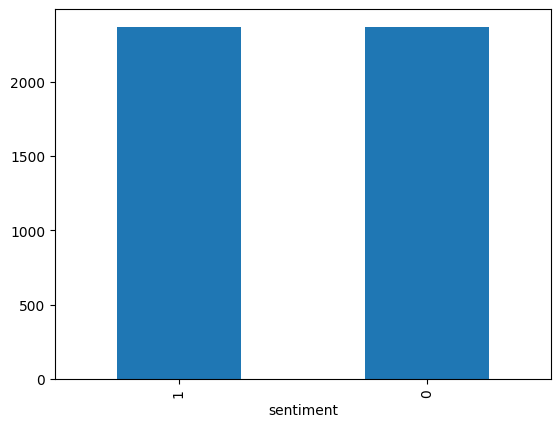

In [31]:
y_train_resampled.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

In [32]:
model = SVC()
model.fit(X_train_cv_resampled, y_train_resampled)

SVC()

In [33]:
X_test_cv = count_vectorizer.transform(X_test)

In [34]:
y_pred = model.predict(X_test_cv)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [35]:
training_accuracy = accuracy_score(y_train_resampled, model.predict(X_train_cv_resampled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_cv))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.9183544303797468
Test accuracy : 0.8224390243902439
Difference : 0.09591540598950299


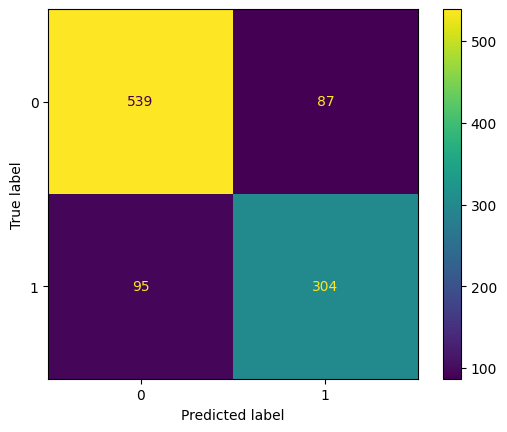

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [37]:
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.8502    0.8610    0.8556       626
           1     0.7775    0.7619    0.7696       399

    accuracy                         0.8224      1025
   macro avg     0.8138    0.8115    0.8126      1025
weighted avg     0.8219    0.8224    0.8221      1025

